In [1]:
import pandas as pd
import numpy as np

from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, tree, ensemble
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [110]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


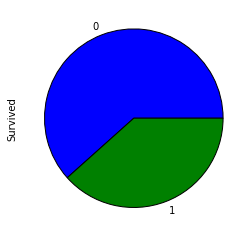

In [112]:
train.Survived.value_counts().plot(kind='pie', figsize=(4,4))

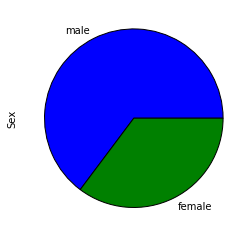

In [113]:
train.Sex.value_counts().plot(kind='pie', figsize=(4,4))

In [114]:
train.drop(['Name'], axis=1, inplace=True)
test.drop(['Name'], axis=1, inplace=True)

In [115]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [116]:
train['Test'] = False
test['Test'] = True
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Test
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False


In [118]:
data = pd.concat([train, test], ignore_index=True)
data.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Test,Ticket
0,22.0,NaN,S,7.2500,0,1,3,male,1,0.0,False,A/5 21171
1,38.0,C85,C,71.2833,0,2,1,female,1,1.0,False,PC 17599
2,26.0,NaN,S,7.9250,0,3,3,female,0,1.0,False,STON/O2. 3101282
3,35.0,C123,S,53.1000,0,4,1,female,1,1.0,False,113803
4,35.0,NaN,S,8.0500,0,5,3,male,0,0.0,False,373450


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 4 columns):
Age        1309 non-null float64
Fare       1309 non-null float64
Parch      1309 non-null float64
SexBool    1309 non-null float64
dtypes: float64(4)
memory usage: 51.1 KB


In [119]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Test              0
Ticket            0
dtype: int64

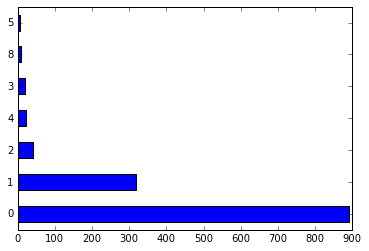

In [120]:
data.SibSp.value_counts()[:20].plot(kind='barh')

In [121]:
data['SexBool']=(data.Sex=='male').astype(int)
data.drop(['Sex'], axis=1,inplace=True)
data.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Test,Ticket,SexBool
0,22.0,NaN,S,7.2500,0,1,3,1,0.0,False,A/5 21171,1
1,38.0,C85,C,71.2833,0,2,1,1,1.0,False,PC 17599,0
2,26.0,NaN,S,7.9250,0,3,3,0,1.0,False,STON/O2. 3101282,0
3,35.0,C123,S,53.1000,0,4,1,1,1.0,False,113803,0
4,35.0,NaN,S,8.0500,0,5,3,0,0.0,False,373450,1


In [122]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [123]:
train.Cabin.value_counts().head()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
F33            3
Name: Cabin, dtype: int64

In [138]:
data['idEmbar']=0
data.idEmbar[data['Embarked']=='C']=1
data.idEmbar[data['Embarked']=='Q']=2
data[data['Embarked']=='Q'].head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Test,Ticket,SexBool,idEmbar
5,NaN,NaN,Q,8.4583,0,6,3,0,0.0,False,330877,1,2
16,2.0,NaN,Q,29.1250,1,17,3,4,0.0,False,382652,1,2
22,15.0,NaN,Q,8.0292,0,23,3,0,1.0,False,330923,0,2
28,NaN,NaN,Q,7.8792,0,29,3,0,1.0,False,330959,0,2
32,NaN,NaN,Q,7.7500,0,33,3,0,1.0,False,335677,0,2


In [139]:
data.drop(['Embarked', 'Cabin','Ticket','PassengerId'], axis=1,inplace=True)

In [140]:
data.head()

,Age,Fare,Parch,Pclass,SibSp,Survived,Test,SexBool,idEmbar
0,22.0,7.2500,0,3,1,0.0,False,1,0
1,38.0,71.2833,0,1,1,1.0,False,0,1
2,26.0,7.9250,0,3,0,1.0,False,0,0
3,35.0,53.1000,0,1,1,1.0,False,0,0
4,35.0,8.0500,0,3,0,0.0,False,1,0


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 9 columns):
Age         1046 non-null float64
Fare        1308 non-null float64
Parch       1309 non-null int64
Pclass      1309 non-null int64
SibSp       1309 non-null int64
Survived    891 non-null float64
Test        1309 non-null bool
SexBool     1309 non-null int32
idEmbar     1309 non-null int64
dtypes: bool(1), float64(3), int32(1), int64(4)
memory usage: 88.2 KB


In [142]:
data.isnull().sum()

Age         263
Fare          1
Parch         0
Pclass        0
SibSp         0
Survived    418
Test          0
SexBool       0
idEmbar       0
dtype: int64

In [146]:
data[data['Fare'].isnull()]=data.Fare.mean()

In [143]:
nullAge=data.copy()
#data=nullAge

In [144]:
data[data['Age'].isnull()] = data.Age.mean()

In [147]:
data.isnull().sum()

Age           0
Fare          0
Parch         0
Pclass        0
SibSp         0
Survived    331
Test          0
SexBool       0
idEmbar       0
dtype: int64

In [148]:
import scipy.stats as ss

In [149]:
data.corr()

,Age,Fare,Parch,Pclass,SibSp,Survived,Test,SexBool,idEmbar
Age,1.000000,0.178410,-0.007806,-0.026022,-0.015052,0.004959,0.002250,0.003991,0.003722
Fare,0.178410,1.000000,-0.040765,-0.092522,-0.044725,-0.038377,-0.052702,-0.061424,-0.047422
Parch,-0.007806,-0.040765,1.000000,0.995796,0.997255,0.998107,0.997344,0.996809,0.997041
Pclass,-0.026022,-0.092522,0.995796,1.000000,0.995571,0.997124,0.996986,0.997405,0.996547
SibSp,-0.015052,-0.044725,0.997255,0.995571,1.000000,0.997608,0.996976,0.996710,0.996676
Survived,0.004959,-0.038377,0.998107,0.997124,0.997608,1.000000,0.999487,0.998440,0.999032
Test,0.002250,-0.052702,0.997344,0.996986,0.996976,0.999487,1.000000,0.998691,0.998673
SexBool,0.003991,-0.061424,0.996809,0.997405,0.996710,0.998440,0.998691,1.000000,0.998299
idEmbar,0.003722,-0.047422,0.997041,0.996547,0.996676,0.999032,0.998673,0.998299,1.000000


In [150]:
befCorr=data
#data=befCorr
befCorr.head()

,Age,Fare,Parch,Pclass,SibSp,Survived,Test,SexBool,idEmbar
0,22.0,7.2500,0.0,3.0,1.0,0.0,0.0,1.0,0.0
1,38.0,71.2833,0.0,1.0,1.0,1.0,0.0,0.0,1.0
2,26.0,7.9250,0.0,3.0,0.0,1.0,0.0,0.0,0.0
3,35.0,53.1000,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,35.0,8.0500,0.0,3.0,0.0,0.0,0.0,1.0,0.0


In [151]:
befCorr.drop(['Pclass'], axis=1, inplace=True)

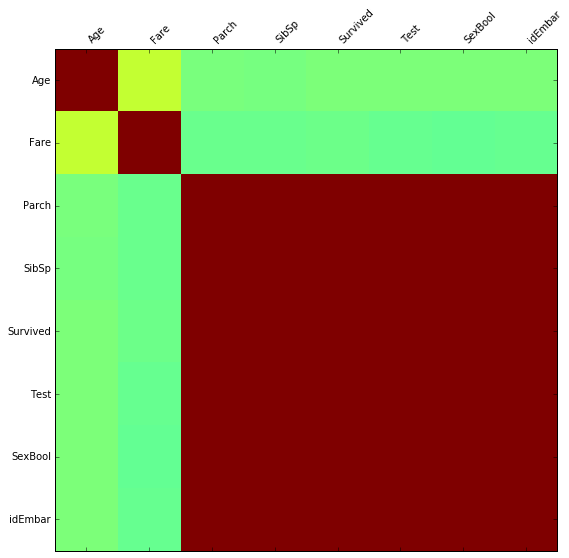

In [152]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.matshow(befCorr.corr(), vmin=-1, vmax=1)
plt.yticks(range(befCorr.shape[1]), befCorr.columns)
plt.xticks(range(befCorr.shape[1]), befCorr.columns, rotation=45, ha="left" )
plt.show()

In [160]:
from sklearn import cross_validation, datasets, metrics, tree, ensemble
from sklearn import preprocessing

In [196]:
data.head()

,Age,Fare,Parch,SibSp,Survived,Test,SexBool,idEmbar
0,22.0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0
1,38.0,71.2833,0.0,1.0,1.0,0.0,0.0,1.0
2,26.0,7.9250,0.0,0.0,1.0,0.0,0.0,0.0
3,35.0,53.1000,0.0,1.0,1.0,0.0,0.0,0.0
4,35.0,8.0500,0.0,0.0,0.0,0.0,1.0,0.0


In [167]:
x=data[data.Test==False].copy()
x.drop(['Survived'], axis=1, inplace=True)

In [173]:
x=pd.DataFrame(preprocessing.normalize(x))
x.head()

,0,1,2,3,4,5,6
0,0.947992,0.312406,0.0,0.043091,0.0,0.043091,0.000000
1,0.470345,0.882309,0.0,0.012377,0.0,0.000000,0.012377
2,0.956551,0.291564,0.0,0.000000,0.0,0.000000,0.000000
3,0.550270,0.834839,0.0,0.015722,0.0,0.000000,0.000000
4,0.974178,0.224061,0.0,0.000000,0.0,0.027834,0.000000


In [175]:
y=data[data.Test==False].Survived.copy()

In [109]:
data.head()

,Age,Fare,Parch,SexBool
0,22.0,7.2500,0.0,1.0
1,38.0,71.2833,0.0,0.0
2,26.0,7.9250,0.0,0.0
3,35.0,53.1000,0.0,0.0
4,35.0,8.0500,0.0,1.0


In [176]:
x_tr,x_ts,y_tr,y_ts=cross_validation.train_test_split(x,y,test_size = 0.3)

In [193]:
clf = ensemble.RandomForestClassifier(n_estimators = 200, max_depth = 5, random_state = 1)

In [195]:
clf.fit(x_tr, y_tr)
predictions = clf.predict(x_ts)
metrics.accuracy_score(y_ts, predictions)
cross_validation.cross_val_score(clf, x, y, scoring = 'accuracy', cv = 10).mean()

0.79407276995305165

In [ ]:
x_test=
predictions = clf.predict(dat)

In [ ]:
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": predictions
})

submission.to_csv("titanic-submission.csv", index=False)